In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import latexify
from graphviz import Digraph

In [2]:
@latexify.with_latex
def f(x):
    return 3*x**2 -4*x +5
f

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x7f7005bf6a10>

In [3]:
#@latexify.with_latex
f(2.0)

9.0

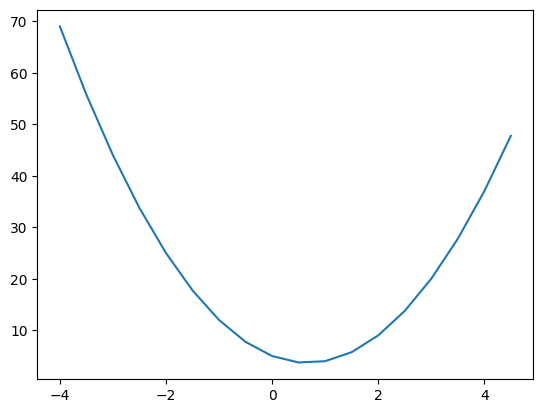

In [4]:
xp=np.arange(-4,5,0.5)
yp=f(xp)
plt.plot(xp,yp)

In [5]:
#let have some intution about the expression derivative
#inputs 
h=0.001
a=1
b=-6
c=10
d=a*b-c
print((f(a+h)-f(a))/h)
print(d)


2.002999999999311
-16


In [6]:
h=0.001
d1=a*b-c
c+=h
d2=a*b-c
print("d1",d1)
print("d2",d2)
print("slop",(d1-d2)/h)

d1 -16
d2 -16.000999999999998
slop 0.9999999999976694


### section 2 build the data struct to handle input of values function 
1. here we will create a class object Value that repesent the data structure of some operations 
2. after we will need to create a graph to show to trace the tyep OP and data's value 

* that will help us to understand Backware-forwared algorithm 

In [7]:
class Value:
    def __init__(self,data,_child={},_op='',label='',grad=0.0):
        self.data=data
        self._prev=set(_child)
        self._op=_op
        self._backward= lambda :None 
        self.grad=0.0
        self.label=label
        
    def __repr__(self):
        return f"value(data={self.data})"
    
    def __add__(self,other):
        out=Value(self.data+other.data,(self,other),'+')
        def _backward(): 
            self.grad += 1.0 * out.grad
            other.data += 1.0 * out.grad
        out._backward = _backward
        return out
            
            
    
    def __mul__(self,other):
        out=Value(self.data * other.data,(self,other),'*')
        def _backward():
            self.grad += other.grad * out.grad
            other.grad += self.grad * out.grad
        out._backward = _backward
        return out
    
        
    
    def tanh(self):
        x=self.data
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out=Value(t,{self,},'tanh')
        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out 
    
    def backward(self):
    
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
            for child in v._prev:
                build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
    
a=Value(2.3,label='a')
b=Value(0.3,label='b')
c =Value(0.6,label='c')
e=a*c;e.label='e'
d=e+b;d.label='d'
f=Value(2.0,label='f')
L=d*f;L.label='output'

L._prev


{value(data=1.68), value(data=2.0)}

In [8]:
#d._prev
d._op

'+'

In [9]:
#let us first build the graph (nodes and edges) to store them 
# in pathaway 
def trace(root):
    nodes , edges= set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for chlid in v._prev:
                edges.add((chlid,v))
                build(chlid)
    build(root)
    return nodes,edges

def draw_dot(root):
    dot=Digraph(format="svg",graph_attr={'rankdir':"RL"})
    
    nodes,edges=trace(root)
    for n in nodes:
        # for any value in the graph, create a rectangular ('record') node for it
        uid=str(id(n))
        dot.node(name=uid,label="%s | data %.4f | grad %.4f"  % (n.label,n.data,n.grad),shape="record")
        if n._op:
            dot.node(name=uid + n._op,label=n._op)
            dot.edge(uid+n._op,uid)
    for n1 , n2 in edges:
        dot.edge(str(id(n1)),str(id(n2))+n2._op)
                 
    return dot        
                 
    
           

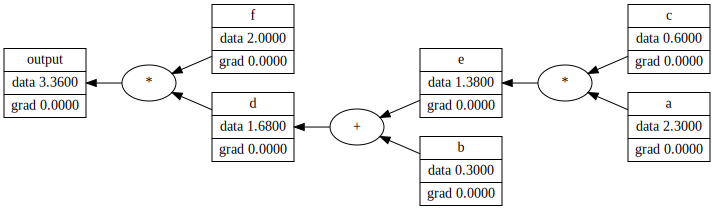

In [10]:
import os
os.environ["PATH"] += os.pathsep + '/home/yunus/mirco/algo/lib/python3.7/site-packages/graphviz'
draw_dot(L)

* To insert a mathematical formula of Derivative function ay point to calculte the Grad of rate change
 as follows:

Derivative function:

$$ f'(x) = \lim\limits_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}   $$



In [11]:
f.grad=1.6
d.grad=2
e.grad=2
b.grad=2
L.grad= 1.0

##### Chaine rule 
the chain rule is a formula that expresses the derivative of the composition of two differentiable functions f and g in terms of the derivatives of f and g. More precisely, if

$$ h = f ∘ g {\displaystyle h=f\circ g} {\displaystyle h=f\circ g} $$
is the function such that 

$$$$$$ h ( x ) =  ( g ( x ) ) {\displaystyle h(x)=f(g(x))} {\displaystyle h(x)=f(g(x))} $$$$$$

for every x, then the chain rule is, in Lagrange's notation, 

The chain rule may also be expressed in Leibniz's notation. If a variable z depends on the variable y, which itself depends on the variable x (that is, y and z are dependent variables), then z depends on x as well, via the intermediate variable y. In this case, the chain rule is expressed as

  $$ {\displaystyle {\frac {dz}{dx}}={\frac {dz}{dy}}\cdot {\frac {dy}{dx}},} {\displaystyle {\frac {dz}{dx}}={\frac {dz}{dy}}\cdot {\frac {dy}{dx}},} $$

and

  $$ {\displaystyle \left.{\frac {dz}{dx}}\right|_{x}=\left.{\frac {dz}{dy}}\right|_{y(x)}\cdot \left.{\frac {dy}{dx}}\right|_{x},} {\displaystyle \left.{\frac {dz}{dx}}\right|_{x}=\left.{\frac {dz}{dy}}\right|_{y(x)}\cdot \left.{\frac {dy}{dx}}\right|_{x},} $$

In [12]:
def chaine_role():
    h=0.01
    a=Value(2.3,label='a')
    b=Value(0.3,label='b')
    c =Value(0.6,label='c')
    e=a*c;e.label='e'
    d=e+b;d.label='d'
    f=Value(2.0,label='f')
    L=d*f;L.label='output'
    L1=L.data
    
    a=Value(2.3,label='a')
    b=Value(0.3,label='b')
    b.data+=h
    c =Value(0.6,label='c')
    e=a*c;e.label='e'
    #e.data+=h
    d=e+b;d.label='d'
    f=Value(2.0,label='f')
    L=d*f;L.label='output'
    L2=L.data
    print((L2-L1)/h)
chaine_role()   

2.0000000000000018


#### Section nuilding basic Neural network function 
1. NN is just simple formula functio that combine between Weights and bias repesectively to input data 
2. NN is complec biology stucture but we have simplify function body 
![neural_network](<img src="neural_networks-009.png " width="500" height="500">)
$$ F(x) = \alpha (\sum_{i}^{j}(w_{i}x^{(0)}_{i}+b_{j}^{(0)})$$

##### the activation function that  map the output of funcition to probability distobutions Tanh 
* and there's some few function actication can be used based on the case 
$$ Tanh(x)= \frac{e^{2x} -1}{ e^{2x} -1 } $$


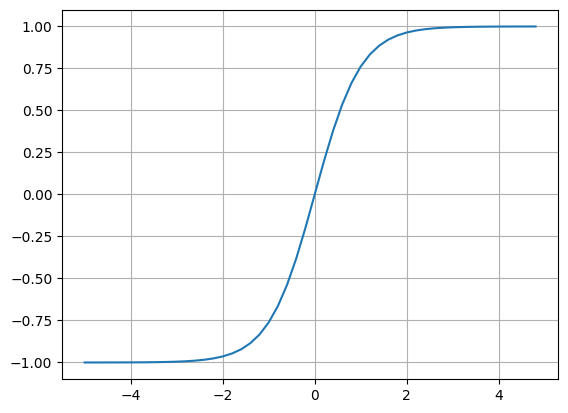

In [13]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [14]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

In [15]:
o.grad = 1.0

In [16]:
o._backward()

In [17]:
#n._backward()

In [18]:
#b._backward()

In [19]:
#x1w1x2w2._backward()

In [20]:
# x2w2._backward()
# x1w1._backward()

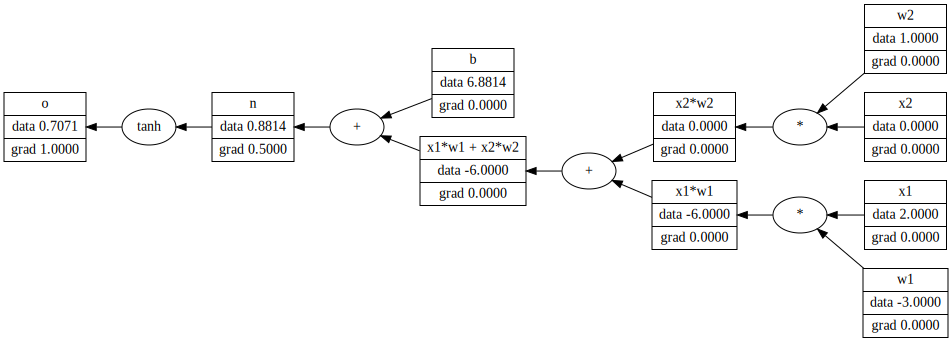

In [21]:
draw_dot(o)